<a href="https://colab.research.google.com/github/cyrus-rule/Data-Science-/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import bambi as bmb
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.9 MB/s eta 0:00:00


# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

Not really, the main purpose of elpd_loo is in the comparison between models predicting the same data. Without multiple models, it's hard to contextualize the value.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model captures noise in the data provided rather than the underlying patterns. This results in a high accuracy with respect to the training set, but bad generalization to new data. This happens when a model is too complex relative to the amount of data we have.

**Task3**:

How do we mitigate overfitting?

By simplifying the model (fewer predictors) or regularizing (priors)

**Task4**:

How do we mitigate underfitting?

By adding more predictors or including interaction terms. Underfitting indicates that we haven't provided enough information to capture the actual underlying causes

**Task5**:

Why would we want more than one predictor in a model?

If the relationships in the data are too complicated to be modeled by only one. Real world happenings are often influenced by multiple factors, so we can predict better if we capture more relevant factors in our models.

**Task6**:

Can we have too many predictors? How would we now?

Yes, too many predictors can lead to overfitting, decreasing the usefulness of the model. We can tell if the model is much more error prone on test data than on the error data.

**Task7**:

What is variable selection, and how does it work?

Varaiable Selection is the process of choosing what variables will be used as the predictors for a model. It's how we mitigate overfitting and ensure our predictors make sense given the real world context.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

1) This model assumes each variable contributes independently to the model (there is no interaction between them) a_1 x + z (z is the value associated this category)

2) Groups by the category, lets each category have different coefficients and constants associated with each of the non categorical predictors. This assumes that how the predictor affects the data depends on which category

3) Adds an interaction term between the categorical and numeric variables. Similar to number 2, allows the category to effect the linear relationship between the predictor and the predicted


**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Not really, we can kinda visualize 2 predictor regression models with 3d visualizations, but beyond that there are just too many predictors to give its own dimension. We can't visualize more than 3 dimensions, so we need to take cross sections in order to get readable plots.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [8]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

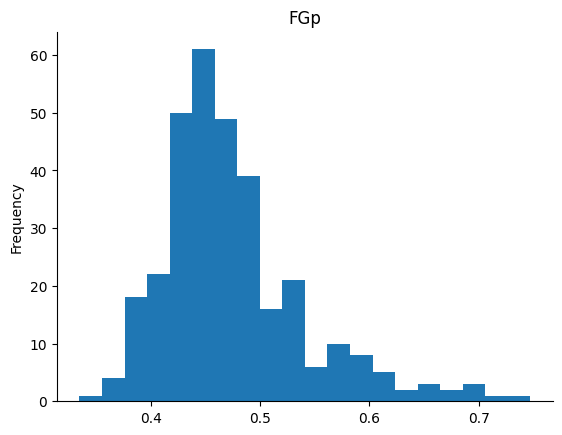

In [5]:
from matplotlib import pyplot as plt
bb['FGp'].plot(kind='hist', bins=20, title='FGp')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
model_a = bmb.Model("FGp ~ FTp + Pos", bb, family="beta")
model_b = bmb.Model("FGp ~ FTp|Pos", bb, family="beta")
model_c = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", bb, family="beta")
model_d = bmb.Model("FGp ~ FTp + Pos + '3PA' + FTp:Pos + Pos:'3PA' + '3PA':FTp ", bb, family="beta")
model_e = bmb.Model("FGp ~ FTp + Pos + '3PA' + Pos:'3PA'", bb, family="beta")

In [31]:
idata_a = model_a.fit(idata_kwargs={"log_likelihood":True})
idata_b = model_b.fit(idata_kwargs={"log_likelihood":True})
idata_c = model_c.fit(idata_kwargs={"log_likelihood":True})
idata_d = model_d.fit(idata_kwargs={"log_likelihood":True})
idata_e = model_e.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1000 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [32]:
model_dict = {
    "model_a": idata_a,
    "model_b": idata_b,
    "model_c": idata_c,
    "model_d": idata_d,
    "model_e": idata_e,
}

comparison_result = az.compare(model_dict, ic="loo")

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1043: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [33]:
comparison_result

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_d,0,526.819888,20.097427,0.000000,9.509255e-01,15.033346,0.000000,False,log
model_c,1,507.673304,14.512379,19.146584,6.355653e-08,17.175770,7.613204,False,log
model_a,2,505.614079,8.470058,21.205809,6.425817e-08,16.305138,7.220590,False,log
model_b,3,429.533746,4.666867,97.286142,4.907454e-02,17.289205,15.369155,False,log
model_e,4,-32578.597786,32896.675405,33105.417673,0.000000e+00,2370.099895,2372.182002,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

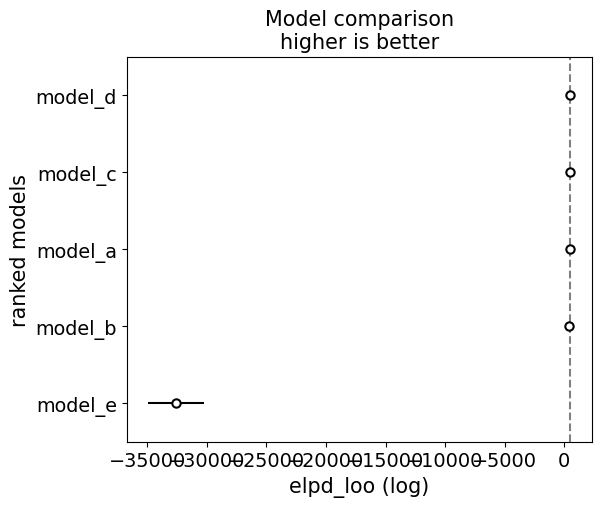

In [34]:
az.plot_compare(comparison_result)


Ok, so it seems model e didnt run properly. Let's try running the model

In [35]:
model_a = bmb.Model("FGp ~ FTp + Pos", bb, family="beta")
model_b = bmb.Model("FGp ~ FTp|Pos", bb, family="beta")
model_c = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", bb, family="beta")
model_d = bmb.Model("FGp ~ FTp + Pos + '3PA' + FTp:Pos + Pos:'3PA' + '3PA':FTp ", bb, family="beta")
model_e = bmb.Model("FGp ~ FTp + Pos + '3PA' + Pos:'3PA'", bb, family="beta")

In [36]:
idata_a = model_a.fit(idata_kwargs={"log_likelihood":True})
idata_b = model_b.fit(idata_kwargs={"log_likelihood":True})
idata_c = model_c.fit(idata_kwargs={"log_likelihood":True})
idata_d = model_d.fit(idata_kwargs={"log_likelihood":True})
idata_e = model_e.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [38]:
model_dict = {
    "model_a": idata_a,
    "model_b": idata_b,
    "model_c": idata_c,
    "model_d": idata_d,
    "model_e": idata_e,
}

comparison_result = az.compare(model_dict, ic="loo")

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

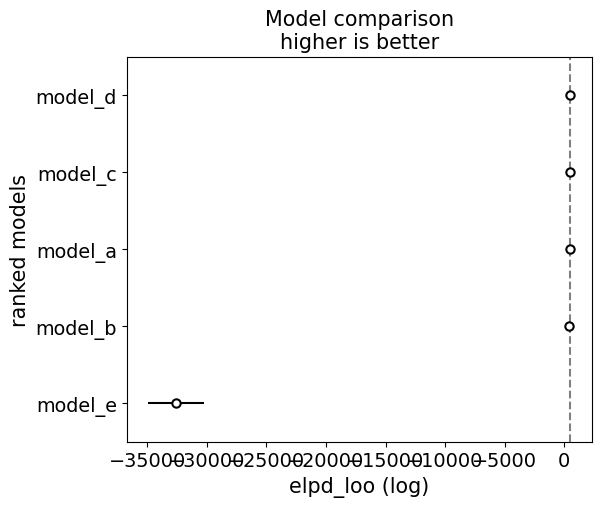

In [37]:
az.plot_compare(comparison_result)


So it happened again. Even though this is not a reasonable assumption, I'll assum the model_e is just really really bad.

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Model d, the most maximal model, was the best according to my testing. This may be a non standard result that I only got because of my choice of likelihood (beta). It makes sense that this model would work reasonably well because it throws a bunch of relevant variables in a pot, but there aren't super meaningful connections between every variable in the interaction terms. Only focusing on the strongest interactions (like just position and 3 point attempts), I would think the model would focus better. To the contrary, however, model e worked very poorly. Again, this could be the result of my methodology though.